# **Employee Attrition Prediction**  
### End-to-End Data Science Project

This project includes exploratory data analysis (EDA), feature engineering, model development, and business insights to predict employee attrition using machine learning.

This project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.


# Pace: Plan
In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

### 🎯 Project Objective

The goal of this project is to analyze HR data and build a predictive model that identifies employees likely to leave the company. This enables HR to take proactive measures to reduce attrition and improve employee satisfaction.
To retain employees.

### Familiarize yourself with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# First, install xgboost
!pip install xgboost

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe

df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers) 



### Gather basic information about the data

In [3]:
# Gather basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [10]:
# Gather descriptive statistics about the data

df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [4]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [5]:
# Rename columns as needed

df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
 
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [6]:
# Check for missing values

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data.

### Check duplicates

Check for any duplicate entries in the data.

In [7]:
# Check for duplicates

df0.duplicated().sum()

np.int64(3008)

3,008 rows contain duplicates. That is 20% of the data.

In [8]:
# Inspect some rows containing duplicates as needed

df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

The above output shows the first five occurences of rows that are duplicated farther down in the dataframe.   You can proceed by dropping them.

In [9]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check outliers

Check for outliers in the data.

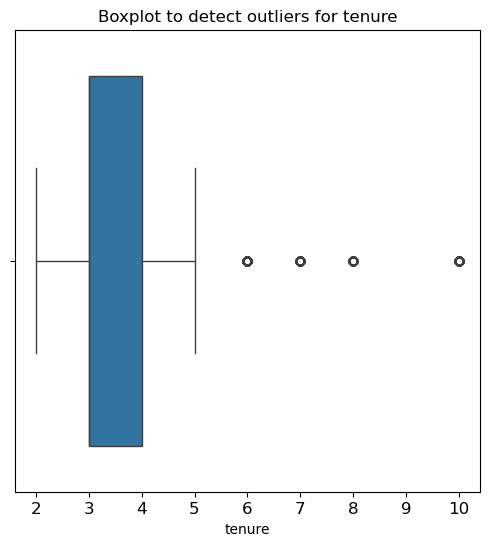

In [10]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

The boxplot above shows that there are outliers in the `tenure` variable. 

It would be helpful to investigate how many rows in the data contain outliers in the `tenure` column.

In [11]:
# Determine the number of rows containing outliers 


# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove these outliers based on the type of model you decide to use. snice we knew tree models doesnt  effected by outliers.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables) 



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [12]:
# Get numbers of people who left vs. stayed

print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed

print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

You could start by creating a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left.

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So, you could also plot a stacked histogram to visualize the distribution of `number_project` for those who stayed and those who left.

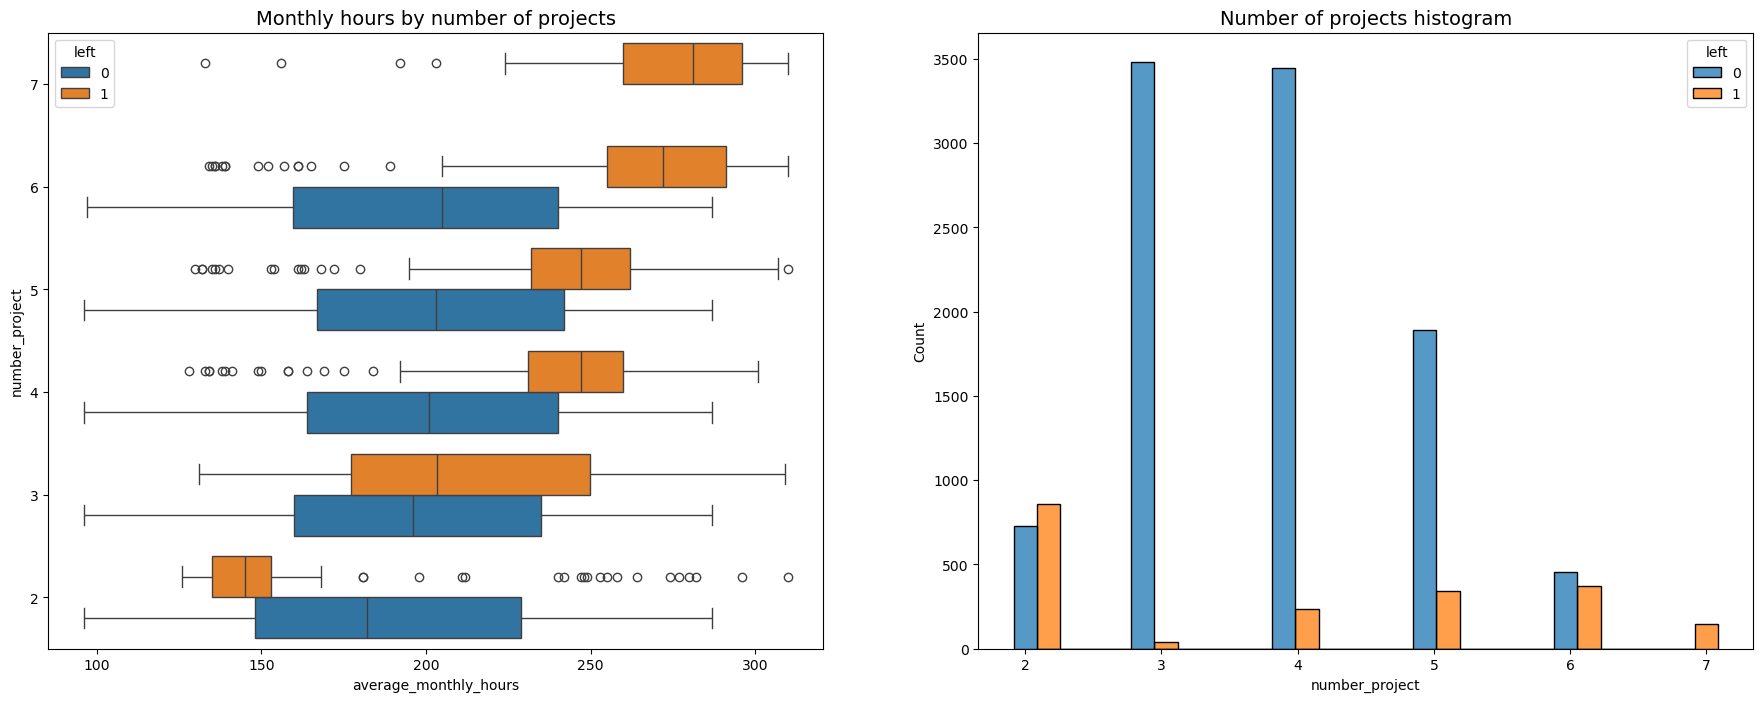

In [20]:
# Create a plot as needed 


# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

### **insights**

### 1. Employees who work on more projects tend to work more hours.
This is natural — more projects = more work.

### 2. Among employees who LEFT the company, there are TWO TYPES:

**A. People who worked MUCH LESS than others in the same project-count group**
- They might have been fired, or
- They may have already decided to leave, so the company gave them less work.

**B. People who worked MUCH MORE than others**
- These are probably the overworked employees.
- They likely carried most of the workload in their project teams.
- These people probably quit because of burnout.

### 3. ⚠️  Everyone with 7 projects left the company
- No one who worked on 7 projects stayed.
- Their working hours were extremely high.
- This is a strong sign of very heavy workload → resignation.

### 4. ⭐ Optimal Project Count: 3–4 projects
- These groups have the lowest percentage of employees leaving.
- Means they had a balanced workload.

**Normal working hours vs this company**

If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. so A typical full-time employee works around 166 hours per month.

**But here:**
Almost ALL project groups work much more than 166 hours. employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked. Shows the company has an overwork problem.

As the next step, you could confirm that all employees with seven projects left. 👍

In [21]:
# Get value counts of stayed/left for employees with 7 projects

# Filter employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()
#  note : snice they are categorys when u use valucounts internally stayed is mapped-0 and left- 1



left
1    145
Name: count, dtype: int64

✅This confirms that all employees with 7 projects did leave. as we can see no 1-stayed

### **lets examine the average monthly hours versus the satisfaction levels.** 

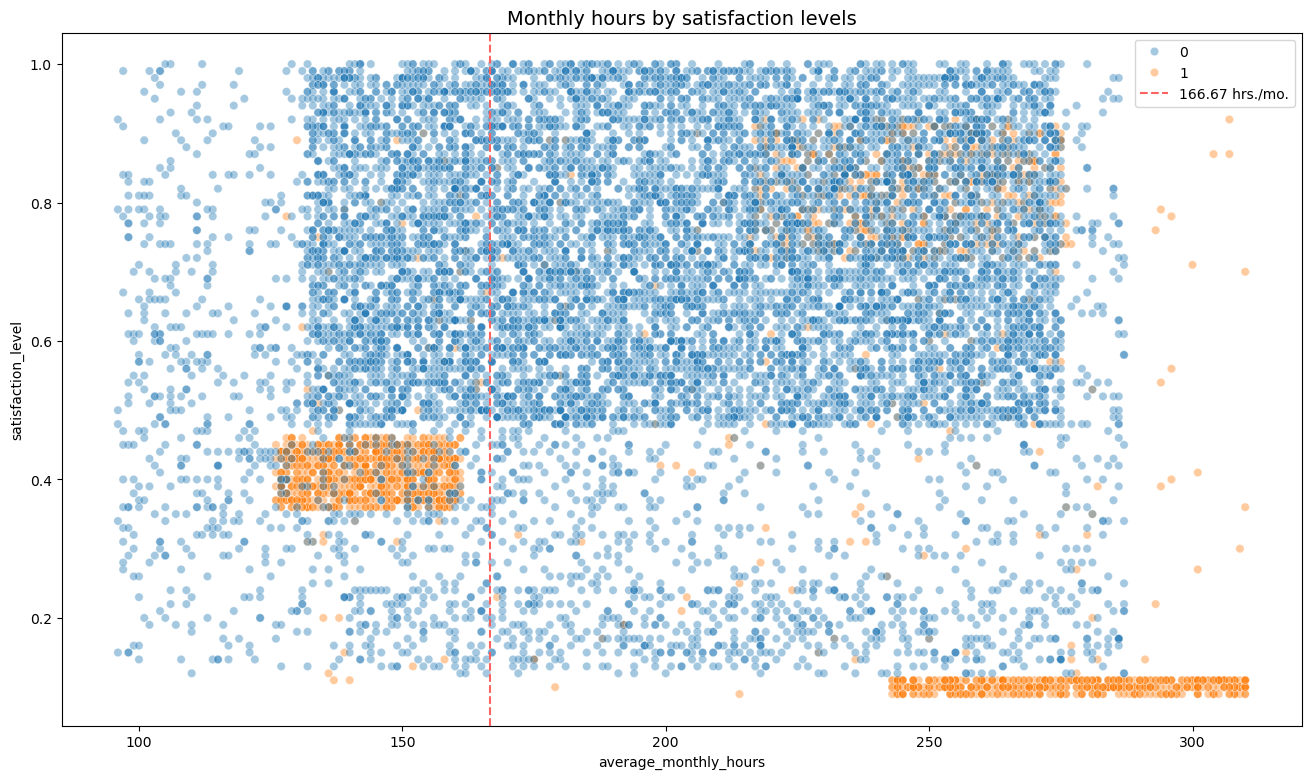

In [13]:
# Create a plot as needed 

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend()
plt.title('Monthly hours by satisfaction levels', fontsize='14');

### **Insight: Relationship Between Work Hours and Satisfaction Levels**
The scatterplot of average monthly working hours versus employee satisfaction reveals three distinct employee groups, each with very different experiences and outcomes.

**1. A large group of employees worked extremely high hours (240–315 hours per month)**
- 315 hours/month = over 75 hours per week (almost double a normal full-time job).
- These employees had very low satisfaction, close to 0.
- 👉 This strongly suggests burnout.
Overwork → exhaustion → dissatisfaction → employees leaving.

**2. Another group worked “normal” hours(around 125-170 housrs per month) but still had low satisfaction (~0.4)**

These employees did not work extreme hours.
But their satisfaction was still low (around 0.4).

Why?
Likely because: 
- They may have felt pressured to work more.
- Poor work environment or lack of recognition
- lack of team support

This indicates that dissatisfaction is not only caused by workload, but also by workplace culture.

**3. Employees working ~210–280 hours per month had the highest satisfaction (0.7–0.9)**

This group shows the highest satisfaction levels in the dataset.
These employees are highly engaged despite heavier workloads.
Possible reasons:
- They may have projects that are meaningful or well-managed.
- Their workload is heavy but not extreme enough to cause burnout.
- These teams may have better leadership or team support.

This suggests that employees can manage higher workloads when the environment is supportive and the workload is distributed fairly.

#### **Overall Conclusion**
The analysis shows a strong relationship between working hours and satisfaction:
- 🔥 Extreme overwork → Very low satisfaction → High attrition
- ⚠️ Normal hours but low satisfaction → Cultural & organizational problems
- ⭐ Balanced heavy workload → High satisfaction and stability

#### **👉 Summary for HR: Data-Driven Insights on Employee Retention**
This analysis highlights several critical factors affecting employee satisfaction and retention at Salifort Motors.
The findings strongly indicate that workload imbalance and excessive working hours are major contributors to employee turnover.
- Extreme overwork is clearly destroying satisfaction.
- Even normal workers are unhappy because of workplace pressure or poor culture.
- Moderately high hours seem to be the most sustainable level for satisfaction.
- This pattern strongly supports the idea that workload imbalance,excessive working hours, and workplace culture are  major causes of turnover.

#### **before analysis:**
Employees handling 7 projects unanimously left the company.

This indicates:
Extreme workload imbalance

#### **📌 Key Recommendations for HR**
Based on these insights, HR should prioritize the following:
1. Reduce extreme workloads
Set strict limits on maximum monthly working hours
2. Rebalance project allocation
Limit project assignments to avoid overload (optimal: 3–4 projects)
3. Improve workplace culture and supportive management: Encourage managers to regularly check in with teams,
Recognize and reward performance fairly so that employees satifaction increase.
4. Monitor early warning signals
Employees with dropping satisfaction scores,Sudden increases in working hours,Employees taking on more than 5–6 projects.
These employees should be prioritized for support to prevent resignation.


#### **🎯 Final Message to HR**
The data clearly shows that employee attrition is not random — it is systematically linked to overwork, workload imbalance, and cultural pressure. Addressing these issues will not only reduce turnover but also improve productivity, engagement, and long-term company performance.   

## **lets inspect satisfaction levels by tenure.**

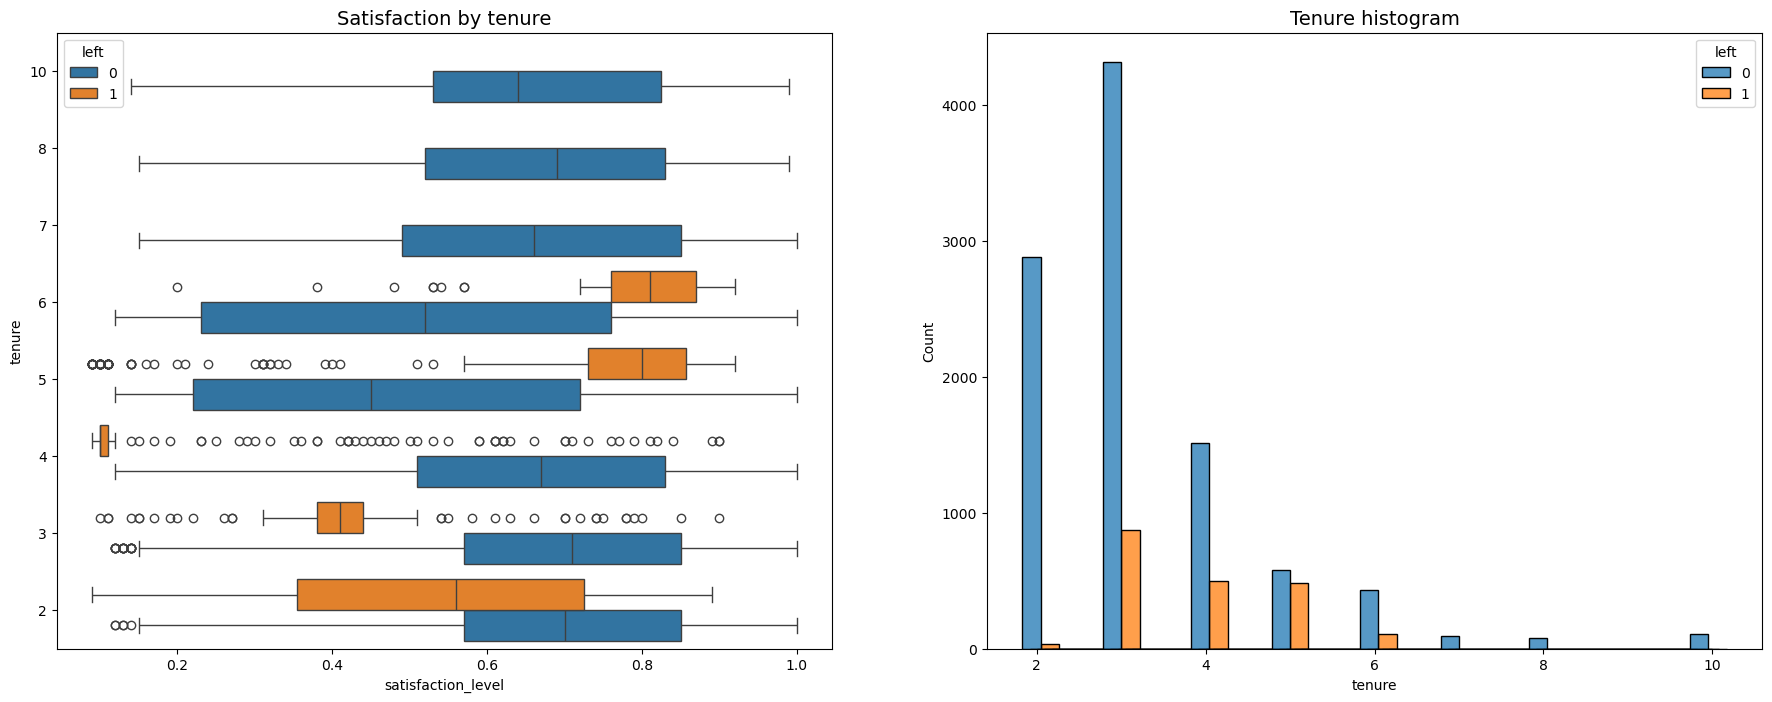

In [23]:
# Create a plot as needed 


# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

From the plot showing satisfaction level vs tenure, several clear patterns emerge:

#### 1. Employees who left fall into two main groups**

**Group A:** Low-tenure employees with low satisfaction

They likely left because:
They didn’t see growth in there carrer.



**Group B:** Medium-tenure employees with high satisfaction

Surprisingly, some people stayed 3–5 years and still left even though they were satisfied.
This could indicate:
Better opportunities elsewhere,
Salary issues,
Limited career progression after a few years.

#### 2. Employees with exactly 4 years of tenure who left have unusually low satisfaction

This dip stands out clearly in the chart.
It suggests that something specific happens around the 4-year mark.

Examples: may be Salary increments issue,Promotion cycles
HR should investigate:
👉 “What happened to employees at the 4-year point?”

#### 3. Employees with the longest tenure (6+ years) did NOT leave.

its becuase may be They might have stable roles and satisfied higher pay or leadership roles.
or they are likely trusted, senior, or in secure positions.
Long-term employees tend to be loyal unless something major disrupts them as we can see from chart very few left.


#### 4. Very few employees stay for long

The histogram shows few people with tenure above 5 years.
This could mean:
The company has trouble retaining people long-term,
Career paths may not support long-term growth,
Only high-performing or senior employees stay beyond 5 years.

**Simple Summary**
- Short-tenure + low satisfaction = early exits
- Middle-tenure (4 years) has a sudden drop in satisfaction → needs investigation
- Long-tenure employees are satisfied and loyal
- Company struggles to keep employees beyond 4–5 years

### 📌**HR Summary**: Tenure and Employee Satisfaction
Our analysis of tenure versus satisfaction reveals several important patterns that can help HR improve long-term retention:

#### 1. Early-tenure employees with low satisfaction are at high risk of leaving
Many employees who left the company had shorter tenures and reported low satisfaction. This suggests that the early employee experience—onboarding, team culture, support, and role clarity—may not be strong enough.
#### 2. A notable drop in satisfaction occurs around the four-year mark
Employees with approximately four years of tenure who left the company show unusually low satisfaction levels. This is a clear signal that something specific may be happening around the 4-year point, such as stalled promotions, pay changes, or limited career progression. HR should investigate this milestone closely.
#### 3. Long-tenured employees appear stable and engaged
Employees with six or more years at the company did not leave. Their satisfaction levels match those of loyal newer employees, suggesting that once individuals pass the mid-tenure phase, they become more committed and satisfied.
#### 4. The company has few long-tenure employees overall
The distribution of tenure shows that relatively few employees stay beyond 5 years. This indicates potential challenges with long-term retention and career growth opportunities.

### **🎯 Key Takeaway for HR**

Retention issues are most prominent among early-tenure employees and around the 4-year point. Strengthening onboarding, development pathways, and mid-career growth opportunities will be essential to improving long-term employee satisfaction and reducing attrition.

#### ⚠️bam! domain knowledge
**what is retention ?**

Retention means how long employees stay at the company.

In [24]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

/var/folders/0x/tjlgljxx6238ttk25lc4vjt00000gn/T/ipykernel_2990/1074052523.py:2: FutureWarning: The provided callable <function mean at 0x106145a80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
/var/folders/0x/tjlgljxx6238ttk25lc4vjt00000gn/T/ipykernel_2990/1074052523.py:2: FutureWarning: The provided callable <function median at 0x106291080> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left. 

### **Next, lets inspect salary levels for different tenures.**

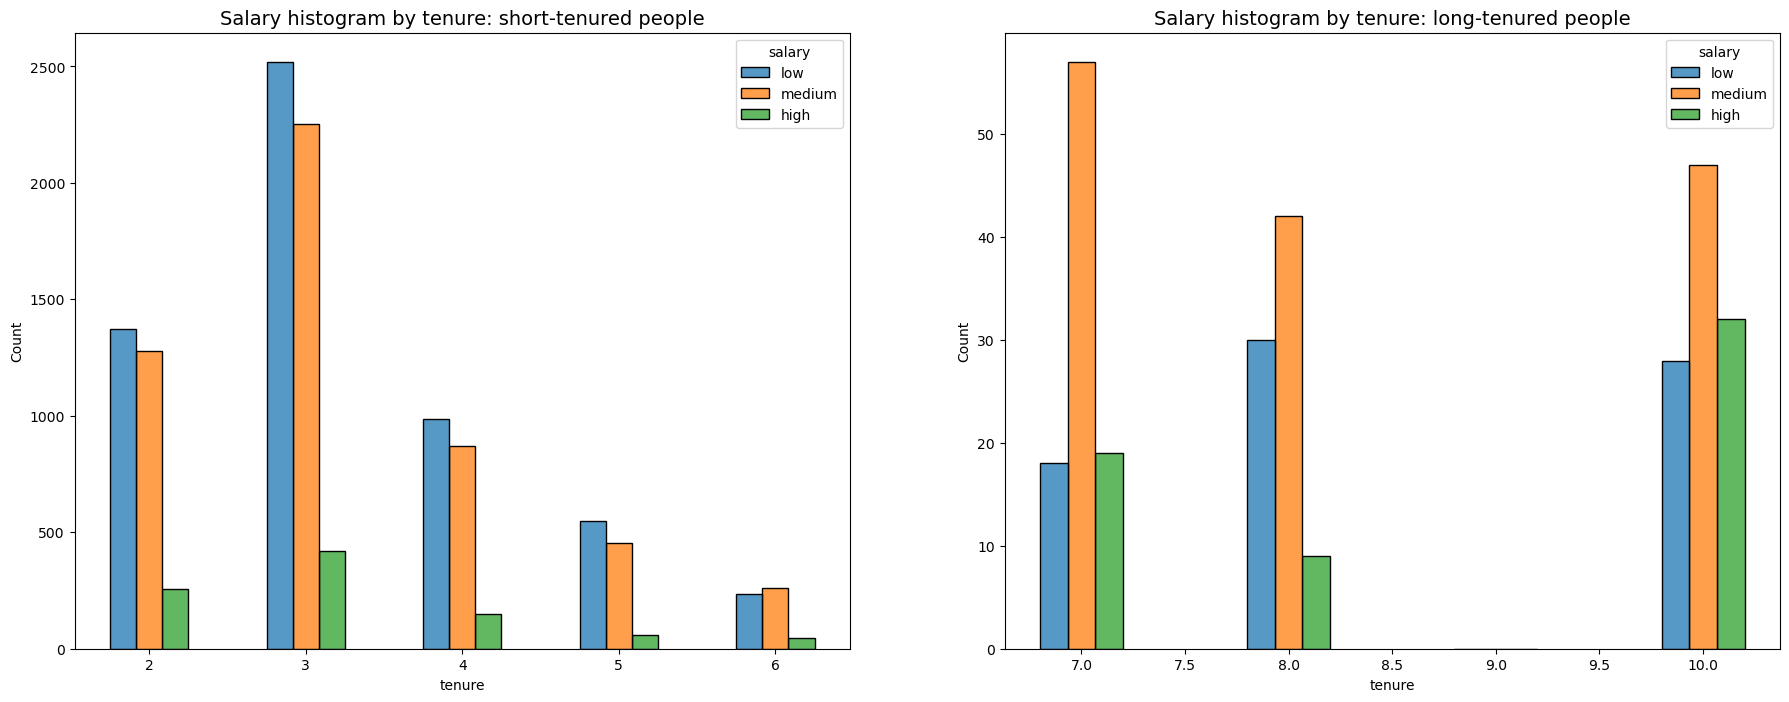

In [25]:
# Create a plot as needed 


# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

the plot shows that
Long-tenured employees are not mostly high-salary workers.
They have a similar mix of low, medium, and high salaries as short-tenured employees.
Short-tenured employees also have the same salary distribution,
So salary does not explain why some employees stay longer.

In short:
👉 Employees are not staying because of higher pay.
Pay does NOT appear to be a major reason for retention.

### **📌 HR Summary: Salary Levels Across Employee Tenure**
The salary distribution across different tenure groups shows that salary is not a strong driver of employee retention at Salifort Motors.
1. Long-tenured employees are not concentrated in higher salary brackets :
Employees who have been with the company for many years are spread across low, medium, and high salary categories. This indicates that longer tenure is not primarily linked to higher pay.
2. Short-tenured employees show the same salary distribution :
Employees with fewer than seven years of tenure have a very similar mix of salary levels. This consistency suggests that salary does not meaningfully differentiate employees who stay from those who leave.
3. Salary does not appear to influence retention :
Because both short-tenured and long-tenured employees share nearly identical salary patterns, so  pay alone is not the reason employees decide to stay or leave.

### **🎯 Key Takeaway for HR**
Salary is not a major factor affecting whether employees remain at the company.
HR should instead focus on other drivers of retention—such as workload balance, career growth, and workplace culture—which show much stronger patterns in the data.





### **Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores.**

You could create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

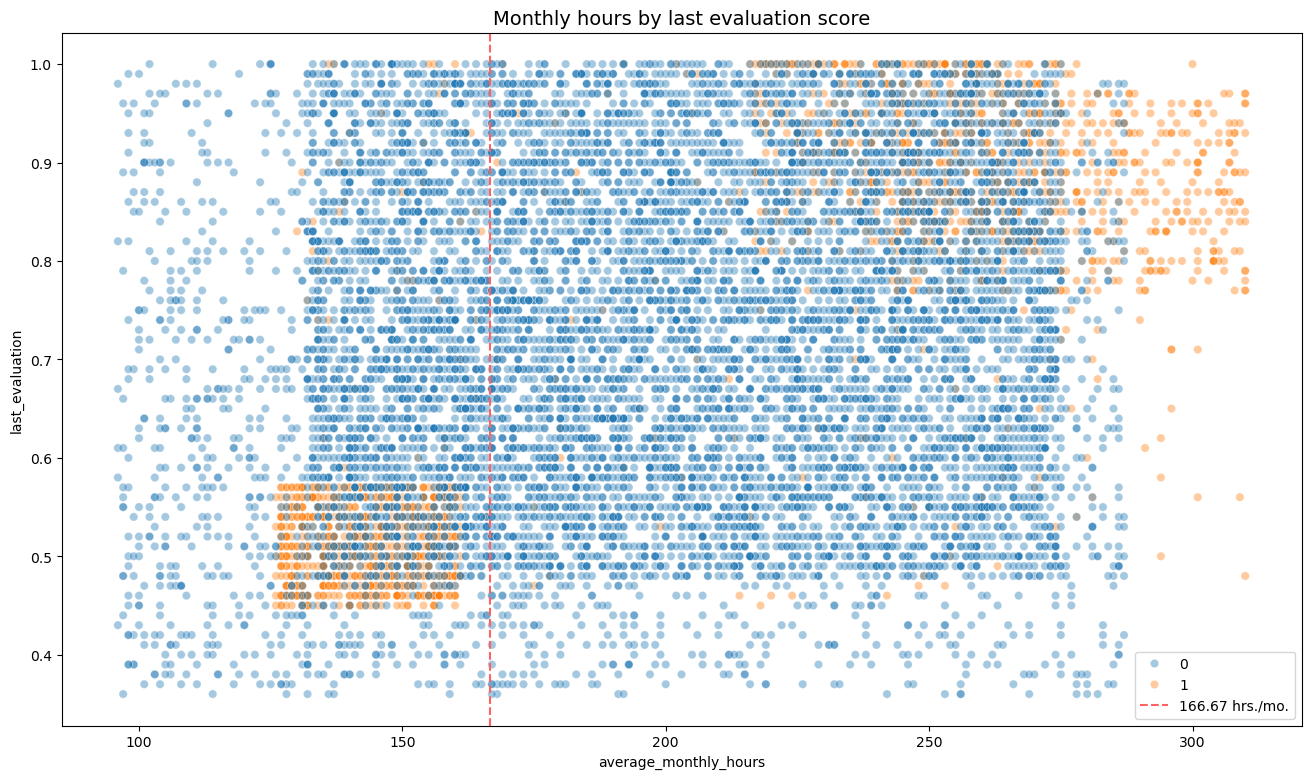

In [26]:
# Create a plot as needed 

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend()

plt.title('Monthly hours by last evaluation score', fontsize='14');

**The following observations can be made from the scatterplot above:**
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There is some relationship between working more hours and getting a higher evaluation score — but it’s not guaranteed.
- Working long hours does not always lead to good evaluation scores, because many high-hour employees still scored poorly.
- Most employees in the company are working far above 167 hours per month, which confirms the earlier finding that the workforce is heavily overworked.

**conclusion:**

so Longer working hours may increase performance scores—but not reliably
While some employees who worked far above the monthly average received high evaluation scores, this trend is not consistent. Many high-hour employees did not achieve strong evaluations, indicating that excessive work does not guarantee strong performance.

### **🎯 Key Takeaway for HR**

High performance is not solely the result of long working hours, and overwork does not reliably improve employee performance

**bam!**

***✅ Why did we make this plot?*** 

We made this plot:
To check if working more hours leads to better performance (higher evaluation scores).

***✅ Why does this matter?*** 

👉 Because HR wants to know:
“Is long working hours actually improve performance or simply cause burnout.

If employees work many hours but don’t get high evaluation scores,
→ HR knows overwork is not helping, and people are getting tired for nothing.
If employees work many hours and get high scores,
→ HR knows these people are stressed high-performers who might leave soon if pressure continues.
If employees work normal hours but still have low scores,
→ HR knows these employees need training or support, not more hours.



### **Next, lets invistigate whether employees who worked very long hours were promoted in the last five years.**

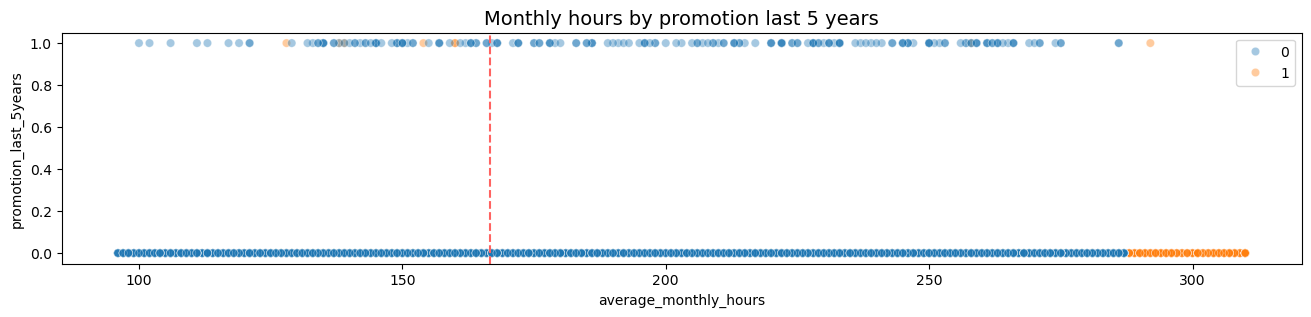

In [27]:
# Create a plot as needed 

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend()
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

**The plot above shows the following:**

- Very few employees who worked extremely long hours were promoted in the last five years.
So working long hours did not increase their chance of getting promoted.
- Most employees who were promoted did not work the highest hours.
Promotion seems unrelated to overwork(unfair promotions).
- Employees who left the company were the ones working the longest hours.
This shows burnout, not reward.

**conclusion:**

Working long hours did NOT lead to promotions — it only led to burnout and employees leaving.

#### **📌 HR Summary: Promotions and Long Working Hours**
Our analysis of monthly working hours versus promotions in the last five years reveals a clear and concerning pattern: employees who work the longest hours are not being promoted, and many of them end up leaving the company.
1. Long working hours do not lead to promotions
Employees who put in extremely high monthly hours (well above the company average) were rarely promoted. This suggests that overwork is not being recognized or rewarded through career advancement.
2. Employees who were promoted did not belong to the overworked group
Most promoted employees worked within normal or moderately high hour ranges. This indicates that promotions are not tied to excessive workload, further reinforcing that long hours offer no career benefit.
3. Employees who left were overwhelmingly those working the longest hours
Every employee who left the company belonged to the highest-hours group. This strongly signals burnout, lack of reward, and unfair workload distribution.

#### **🎯 Key Takeaway for HR**
Employees are overworking without receiving promotions or recognition — instead, they are burning out and leaving.
To improve retention, HR should ensure that promotion opportunities fairly reflect effort and restructure workloads to prevent chronic overwork.

### **Next, you could inspect how the employees who left are distributed across departments.**

In [28]:
# Display counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

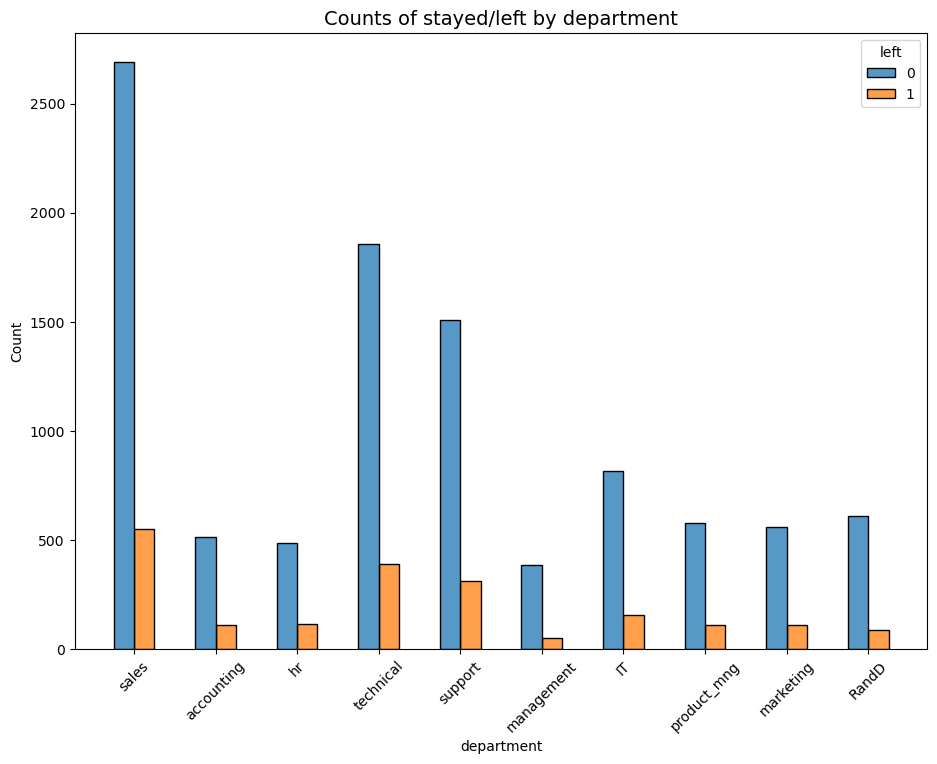

In [29]:
# Create a plot as needed 

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)  
plt.title('Counts of stayed/left by department', fontsize=14);

**from our plot:**

No department stands out as having a higher number of people quitting.
The proportion of employees who left is similar across all departments.
So, leaving the company is NOT a department-specific problem — it is a company-wide issue.

#### **🎯 Key Takeaway for HR**

Employee turnover is a broad organizational problem rather than a department-level issue.
Solutions should focus on company-wide policies—such as workload balance, recognition, and career development—rather than targeting specific departments.

##### ⚠️ **bam! domain knowledge**

**Turnover:** The rate at which employees leave and need to be replaced.

### **Lastly, you could check for strong correlations between variables in the data.**

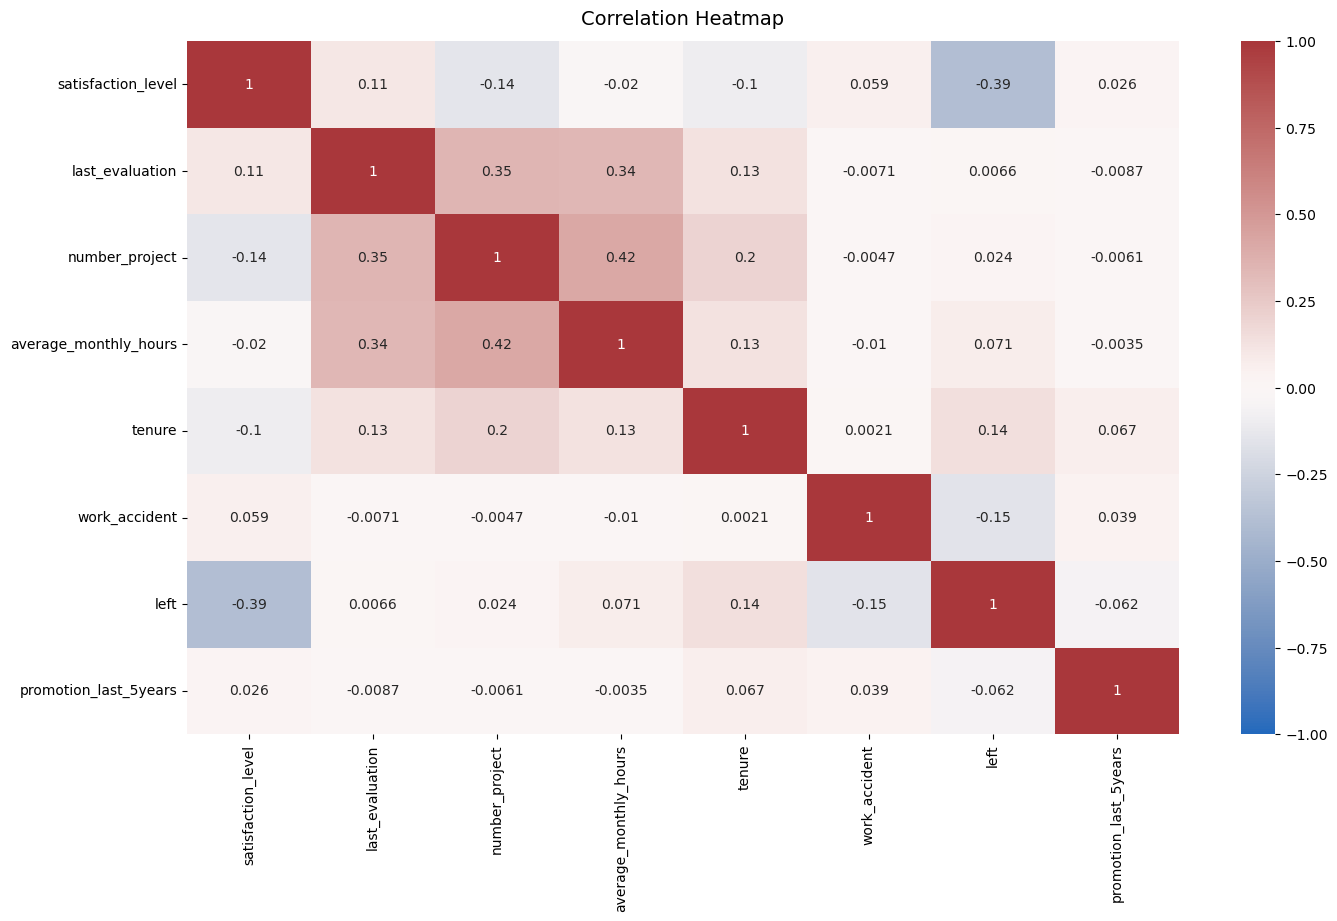

In [30]:
# Create a plot as needed 


# Plot a correlation heatmap
plt.figure(figsize=(16, 9))

# Convert numeric columns to float and select only numeric columns for correlation
numeric_df = df0.select_dtypes(include=['float64', 'int64'])

# Create the heatmap with only numeric columns
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and confirmed whether an employee leaves is negatively correlated with their satisfaction level.

### **📊 final EDA Report: Data-Driven Insights for Employee Retention at Salifort Motors**
**Overview**

The goal of this analysis was to understand why employees leave Salifort Motors and provide clear, actionable recommendations for improving retention. The findings consistently point to overwork, burnout, and limited career growth opportunities as the key drivers of attrition(Employees leaving the company).


### **Key Insights**
##### 🔥 1. Employees are significantly overworked
Most employees work far above the normal monthly average (166 hours).
Many work 240–315 hours/month, which is extremely high.
These high-hour employees show very low satisfaction and are more likely to quit.

→ Overwork is a major cause of burnout and attrition.

##### 🔥 2. Project workload is not balanced
Employees with 7 projects all left the company.
The best retention was seen among employees with 3–4 projects.
Too few and too many projects both increase the chance of leaving.

→ Improper workload distribution strongly affects satisfaction.

##### 🔥 3. Satisfaction drops sharply around the 4-year mark
Employees with about 4 years of tenure show unusually low satisfaction.
This suggests a possible issue at the 4-year point (promotion delays, salary stagnation, role changes, manager relationship issues etc.).

→ HR should investigate what happens at the 4-year tenure milestone.

##### 🔥 4. Long-tenured employees (6+ years) are stable
They are satisfied and rarely leave. however This group is small, meaning long-term retention is a challenge.

→ The company struggles to keep employees beyond 5 years.

##### 🔥 5. Salary does not influence retention
Short-tenured and long-tenured employees have similar salary levels.
High salary does not prevent employees from leaving.

→ Pay is not the reason employees stay or leave.

##### 🔥 6. Working long hours does NOT guarantee better evaluation scores
Some overworked employees perform well—but many do not.
Working long hours does not always improve performance.

→ Overworking employees does not benefit the company consistently.

##### 🔥 7. Overworked employees are NOT being promoted
Employees who worked the longest hours were almost never promoted.
Those who were promoted typically worked moderate hours.
Employees who were overworked and not promoted eventually left.

→ Overwork is not rewarded, leading to frustration and resignation.

##### 🔥 8. No specific department has higher attrition
All departments show similar leave rates.
This means the problem is company-wide, not department-specific.

→ Issues such as overwork and burnout exist across the entire organization.

### **Final Conclusions**
Employee attrition at Salifort Motors is driven by:
 Extremely high working hours,
Burnout from heavy project loads,
Lack of promotions or recognition for effort,
Declining satisfaction after 4 years,
Weak long-term retention strategies,
Company-wide cultural and workload issues,
It is not caused by
Salary differences,
Any specific department.

### **Recommendations for HR**
Reduce excessive working hours
Set a company limit for maximum monthly hours.
Track employee workloads regularly.
Balance project assignments
Target an optimal workload of 3–4 projects per employee.
Avoid assigning 6–7 projects to anyone, which reduces workloads.
modify long-term retention strategies by Improving career growth pathways, Review promotion policies and Offer transparent promotion timelines, especially around the 4-year mark.Identify and support high-risk employees
Overworked high performers
Employees with sudden satisfaction drops
Employees near the 4-year tenure mark.and finnally
Reward performance fairly.
Provide training for employees with low evaluations.

### **Final EDA Summary**
Salifort Motors is facing company-wide burnout and workload imbalance, not department-specific problems. Employees are working extremely long hours although they have no recognization for there efforts,and overtime with no carrer growth(no promotions) leading to dissatisfaction and eventual resignation. By addressing overwork, improving promotions, and HR can significantly improve retention and employee satisfaction.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model 
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


### 🕵 Identify the types of models most appropriate for this task.

Since the variable you want to predict (whether an employee leaves the company) is categorical, you could either build a Logistic Regression model, or a Tree-based Machine Learning model.

So you could proceed with one of the two following approaches. Or, if you'd like, you could implement both and determine how they compare.

## **Modeling Approach A:** Logistic Regression Model

This approach covers implementation of Logistic Regression.

#### Logistic regression
Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [31]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

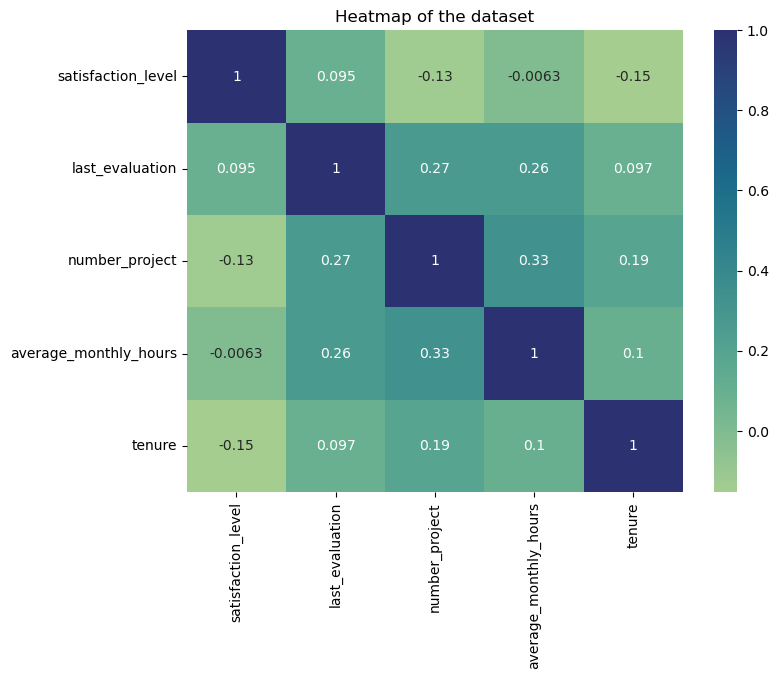

In [32]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't.

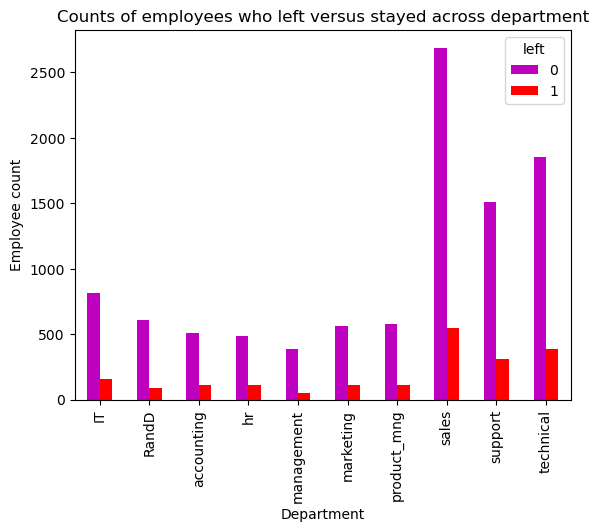

In [33]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier.

In [34]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

Isolate the outcome variable, which is the variable you want your model to predict.

In [35]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Select the features you want to use in your model. Consider which variables will help you predict the outcome variable, `left`.

In [36]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   
5       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

Split the data into training set and testing set. Don't forget to stratify based on the values in `y`, since the classes are unbalanced.

In [37]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Construct a logistic regression model and fit it to the training dataset.

In [38]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Test the logistic regression model: use the model to make predictions on the test set.

In [39]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model. 

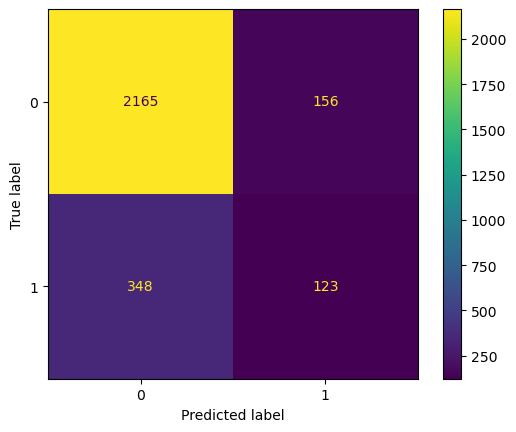

In [40]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

### **Check the class balance in the data.** 

In [41]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

In [42]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

## **Modeling Approach B:** Tree-based Model
This approach covers implementation of Decision Tree and Random Forest. 

#### **🔍 Model Selection**
Before evaluating models, a metric for model selection was chosen.
The target variable showed an 83% : 17% class split, meaning:
- The data is not perfectly balanced
- But it is also not extremely imbalanced
Because of this, accuracy alone is not reliable. A model could score ~83% by always predicting the majority class.

**Selected Metric: ROC-AUC**
The primary metric used for model comparison and hyperparameter tuning is ROC-AUC, because:
- It evaluates model performance across all classification thresholds
- It is robust even when classes are moderately imbalanced
  
All tree-based models (Decision Tree and Random Forest) were tuned using
refit = "roc_auc" during cross-validation. 

which model contributes higher  ROC-AUC score that will be our champhion model.


Isolate the outcome variable.

In [43]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Select the features. 

In [44]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

Split the data into training, validating, and testing sets.

In [45]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### **Decision tree - Round 1**

Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [46]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall', 'roc_auc':'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [47]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 1.84 s, sys: 38.6 ms, total: 1.88 s
Wall time: 1.89 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Identify the optimal values for the decision tree parameters.

In [48]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [49]:
# Check best AUC score on CV
tree1.best_score_

np.float64(0.969819392792457)

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, you can write a function that will help you extract all the scores from the grid search. 

In [50]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

Use the function just defined to get all the scores from grid search.

In [51]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

All of these scores from the decision tree model are strong indicators of good model performance. 

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

### **Random forest - Round 1**

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [52]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall', 'roc_auc':'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [53]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: user 12min 35s, sys: 11.1 s, total: 12min 46s
Wall time: 12min 46s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Identify the best AUC score achieved by the random forest model on the training set.

In [59]:
# Check best AUC score on CV
rf1.best_score_

np.float64(0.9804250949807172)

Identify the optimal values for the parameters of the random forest model.

In [60]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [61]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


## **selecting champhion model 🏆**
The auc evaluation score of random forest is higher than descision trees therby random forest is our final model, not only that other scores also better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model. 

**champhion model : random forest**

Next, you can evaluate the champhion model on the test set.

Define a function that gets all the scores from a model's predictions.

In [62]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Now use the best performing model to predict on the test set.

In [63]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

## **Feature Engineering**

Some features in the dataset (like satisfaction_level) are available only because the data was collected after employees already quit or after HR processed them.
But when the model is deployed in real life,
 HR will NOT know an employee’s future satisfaction_level before they quit.
So if your model uses this feature during training, it learns information that won’t exist when making predictions in the real world.
This is called **data leakage**. Therefore the model should not use that feature, because it won’t be available when deployed.


Certain features in the dataset may cause data leakage, meaning the model learns information that would not be available in real-life prediction. Two important features to handle carefully are:

**1. satisfaction_level (Leakage Risk)**

This feature is often recorded after employees become unhappy or decide to quit.
HR cannot know an employee’s future satisfaction level before they leave. So if your model uses this feature during training, it learns information that won’t exist when making predictions in the real world.

**2. average_monthly_hours (Leakage Risk)**

Employees who are about to quit or be fired may:
Work fewer hours, therfore their average_monthly_hours reduces. the issue is HR cannot predict future reduced hours before it happens
In real life, HR cannot know weeks or months ahead:
When an employee will suddenly reduce hours
How many hours they will eventually work when they are thinking of leaving
But the training data includes this information because it was recorded after the employee had already mentally checked out. if we train this feature it will be data leakage.

✅ **Creating a Safer Feature: overworked**

To avoid leakage, we drop satisfaction_level and simplify average_monthly_hours by creating a new feature:
overworked → a binary variable indicating whether an employee works long hours or not.

**Why we use “overworked”**

We use overworked because: It is a realistic feature that HR actually knows in real life
HR always knows how many hours employees work — 
so this feature will be available when the model is deployed.
Instead of giving the model exact monthly hours (which might contain leakage),
we give it a simple signal:  Is this employee working too many hours? Yes or No. 






**note** that The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

In [64]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [65]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

note : 166 is not a random assumption — it comes from a standard calculation of full-time work hours.

A typical full-time schedule is:
5 days per week, 8 hours per day, 50 working weeks per year (approx., accounting for holidays/vacation)
So the math is:

$
50 weeks × 40 hours per week = 2000 hours per year
$

$
2000 hours ÷ 12 months ≈ 166.67 hours per month
$

So 166 is not an assumption — it’s the standard monthly average for full-time work.

A normal full-time worker averages about 166 hours per month.
So anyone working more than 175 hours can be labeled as overworked.
The overworked feature is made binary:
- 1 = overworked
- 0 = not overworked

👉 You could define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [66]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

Drop the `average_monthly_hours` column.



In [67]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

Again, isolate the features and target variables

In [68]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

Split the data into training and testing sets.

In [69]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### **Decision tree - Round 2**

In [70]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy':'accuracy', 'precision':'precision', 'recall':'recall', 'f1':'f1', 'roc_auc':'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [71]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 1.35 s, sys: 15.3 ms, total: 1.37 s
Wall time: 1.37 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [72]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [73]:
# Check best AUC score on CV
tree2.best_score_

np.float64(0.9586752505340426)

This model performs very well, even without satisfaction levels and detailed hours worked data. 

Next, check the other scores.

In [74]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

### **Random forest - Round 2**

In [75]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy':'accuracy', 'precision':'precision', 'recall':'recall', 'f1':'f1', 'roc_auc':'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [76]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: user 8min 35s, sys: 8.76 s, total: 8min 44s
Wall time: 8min 44s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [79]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [80]:
# Check best AUC score on CV
rf2.best_score_

np.float64(0.9648089938973397)

In [81]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.964809


## **choosing champhion model 🏆**
as we know we choose model based on selected metric AUC 

random forest scores dropped slightly, but the random forest performs better than the decision tree on AUC

Score the **champion model-random forest** on the test set now.

In [82]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

## **champhion model daignosis 🩻**
we can see very similar validation and test performance, which means the model generalizes well and is not overfitting.
This seems to be a stable, well-performing final model. 

### **Plot a confusion matrix to see errors**
so that we know how well it predicts on the test set.

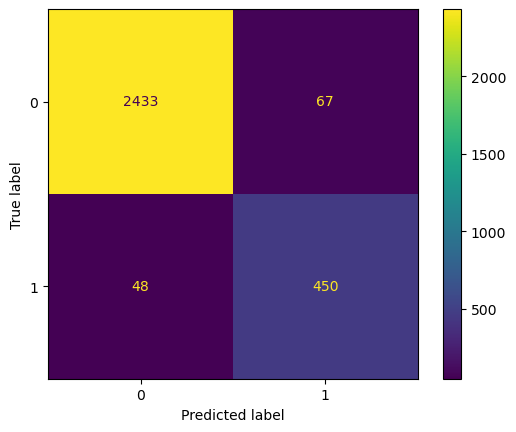

In [83]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features 

### **Decision tree splits**

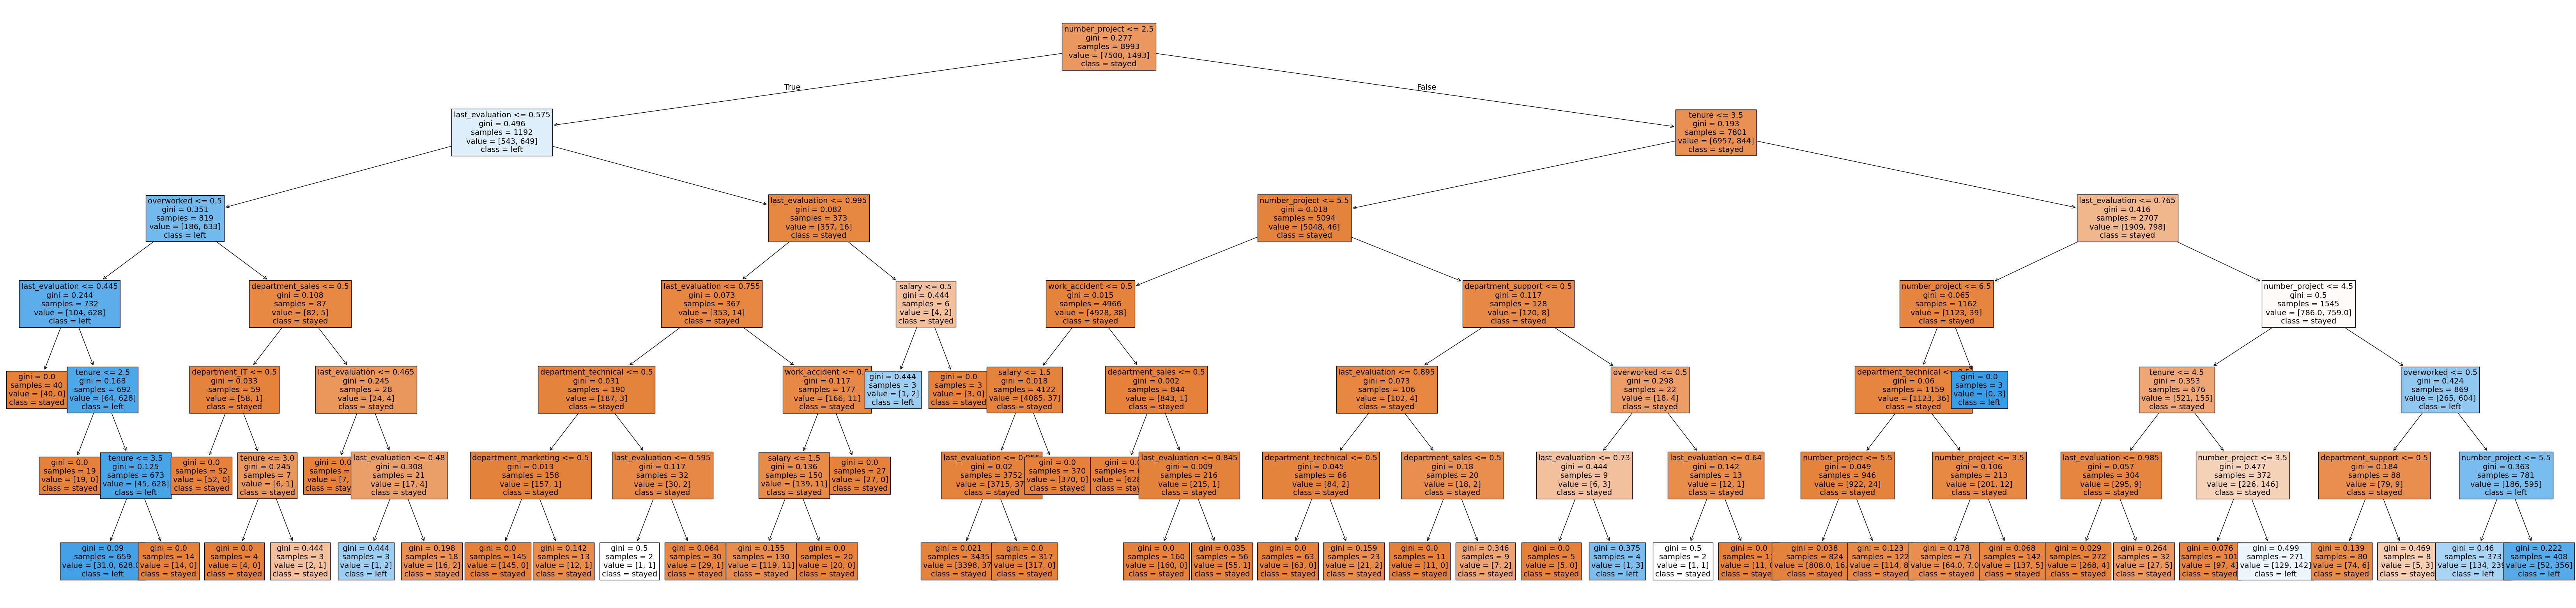

In [84]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

### **Decision tree feature importance**



In [85]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

You can then create a barplot to visualize the decision tree feature importances.

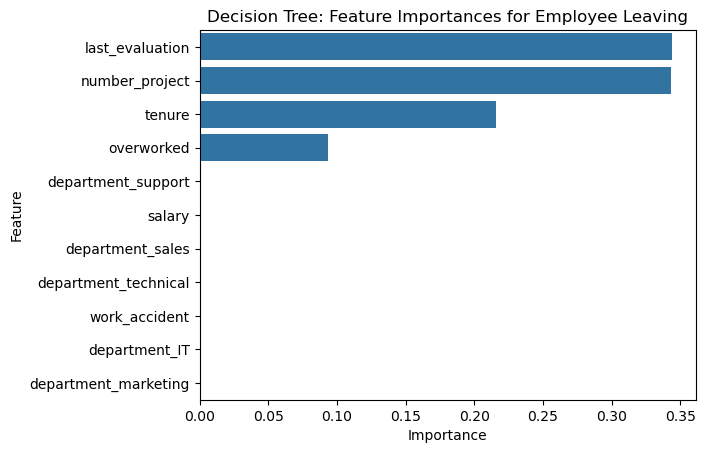

In [86]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()


The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

### **Random forest feature importance**

Now, plot the feature importances for the random forest model.

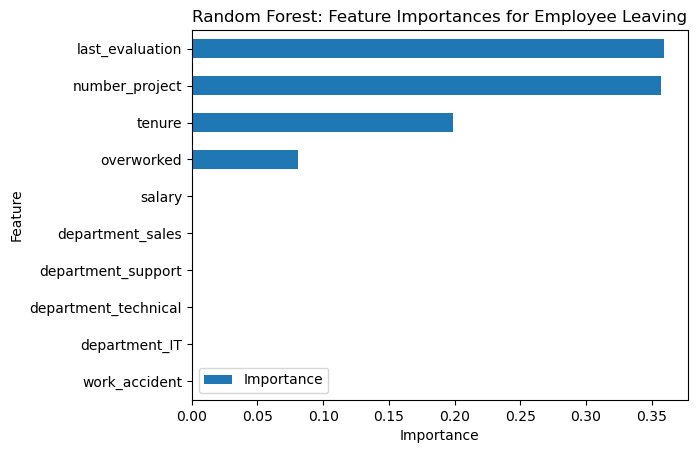

In [87]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

**🔍 Feature Importances (Random Forest)**

The random forest model found the following features to be most important for predicting whether an employee leaves:
- last_evaluation – Highest importance
- number_project
- tenure
- overworked

These features contribute the most to predicting the target variable left, and they match the same important features identified by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



### **Summary of model results**

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model. 

### **Final Business Recommendations for HR**
**💡 1. Monitor and reduce overwork**

Employees logging more than 175 hours/month or handling 7 projects are at high risk.
- Implement: Workload balancing

**💡 2. Recognize and promote high performers**

High-performing employees who are not promoted despite heavy workloads often leave.

HR should:
- Ensure promotion cycles are fair
- Track consistent high performers

**💡 3. Investigate 4-year tenure dip**
Employees at the 4-year mark showed unusually low satisfaction.

Possible actions:
- Review manager relationships
- Provide career development paths

**💡 4. Strengthen early-tenure support**

Most employees who leave the company have only worked there for 2–4 years.
This means new employees are leaving before they fully settle in.
So HR should give extra support during the first few years to help employees adjust and stay.

implement :
- Strong onboarding:
Teach new employees what they need to know so they don’t feel lost or stressed.
- Early mentorship:
Assign a senior person to guide them and answer questions.
- Regular check-ins:
HR or managers meet them at
3 months, 6 months, and 12 months to ask:
“How are things going? Do you need help?”

### **🎉 Final Conclusion**
This project successfully combined EDA, feature engineering, and machine learning to build a reliable attrition prediction model.
The Random Forest model is the champion model, providing strong predictive performance and real-world generalization.
The insights reveal that overwork, lack of recognition, project overload, and tenure patterns are the main drivers of employee exits.
This solution equips HR with actionable insights and a predictive tool to proactively reduce attrition and improve employee satisfaction.